In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans   
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027  \
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
'''The expression (df["class"] == "g") will return a boolean Series 
with True for rows where the condition is met and False otherwise. 
By applying the .astype(int) method to this Series, it converts True values 
to 1 and False values to 0, effectively converting the boolean values into integer values.
'''

df["class"] = (df["class"] == "g").astype(int)

In [4]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans   
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027  \
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

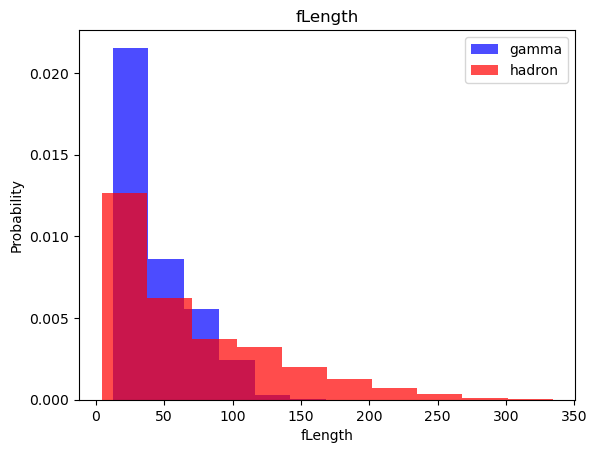

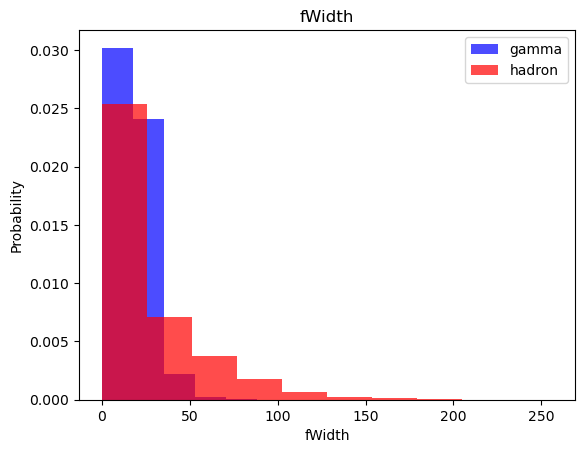

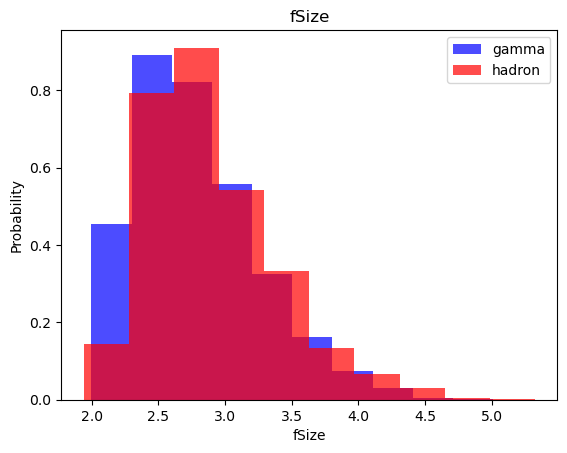

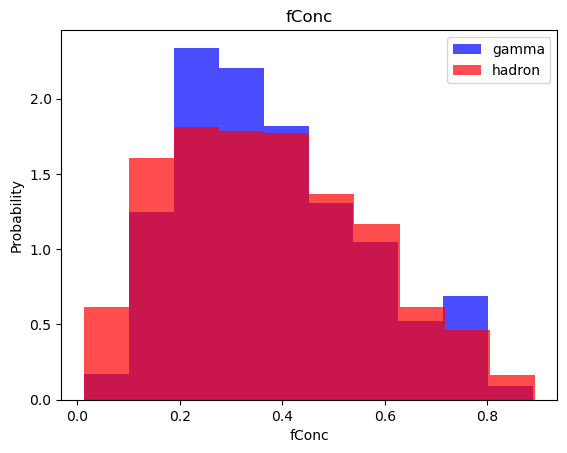

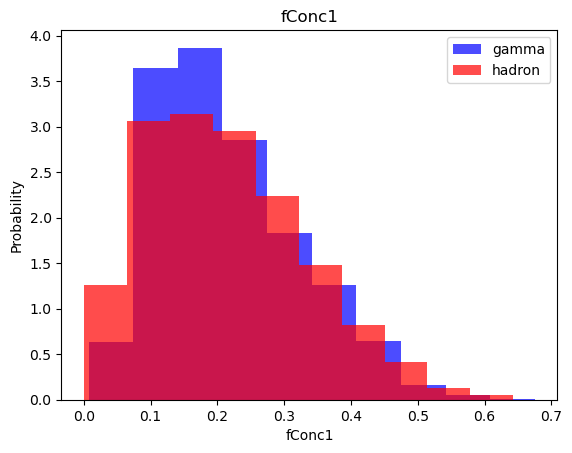

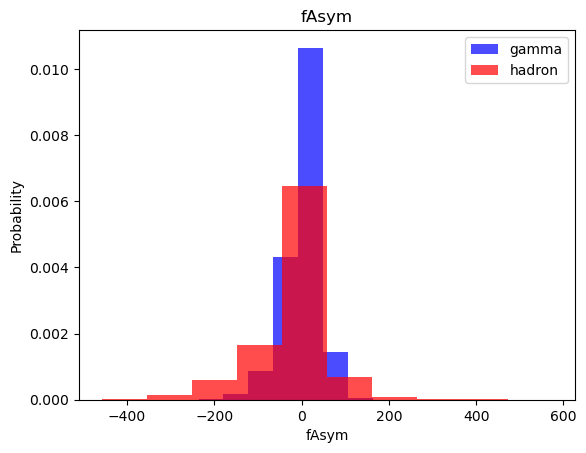

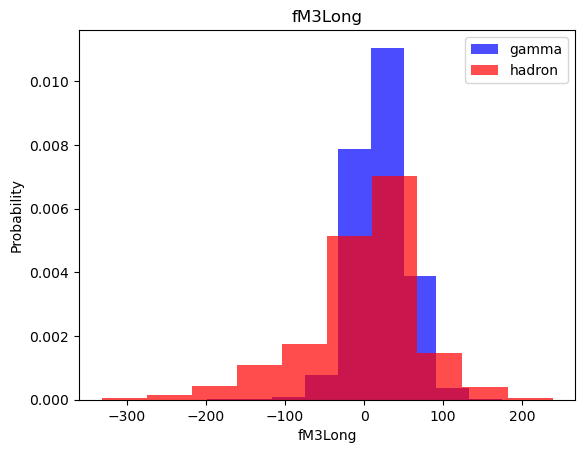

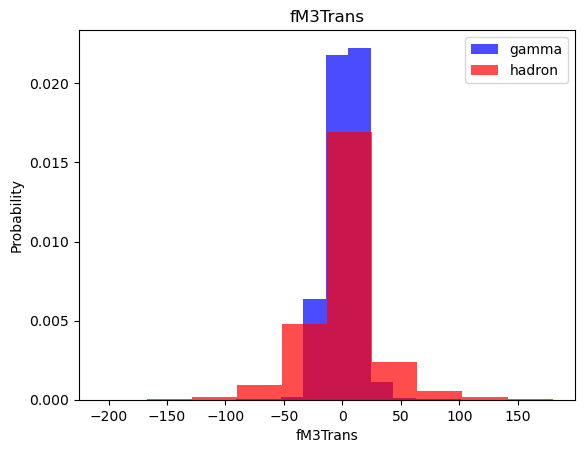

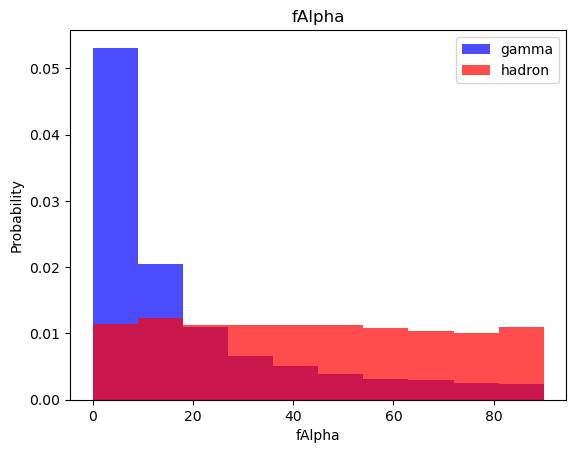

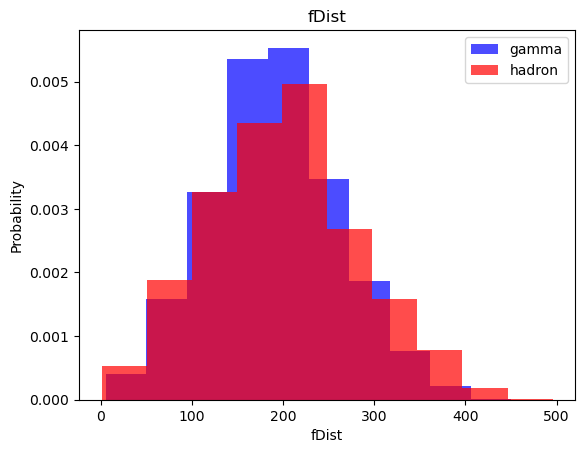

In [5]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

### Train, validation, test datasets

In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [7]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    
    data = np.hstack((X, np.reshape(y,(-1, 1))))
                     
    return data, X, y                 

In [8]:
train, X_train, y_train = scale_dataset(train, oversample=True)
#how does sample perform on random data you havent seen yet. 
#No need to oversample
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

### KNN

Uses proximity to make classifications or predictions about the grouping of an individual data point.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = knn_model.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1380
           1       0.84      0.86      0.85      2424

    accuracy                           0.80      3804
   macro avg       0.79      0.78      0.79      3804
weighted avg       0.80      0.80      0.80      3804



### Naive Bayes

Naive Bayes is a family of probabilistic algorithms that take advantage of probability theory and Bayes’ Theorem to predict the tag of a text (like a piece of news or a customer review). They are probabilistic, which means that they calculate the probability of each tag for a given text, and then output the tag with the highest one

<img src="https://iq.opengenus.org/content/images/2019/11/data-science-bayes-theorem--2---1-.jpg" alt="Log Regression" />



In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [15]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.40      0.51      1380
           1       0.73      0.91      0.81      2424

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.73      0.70      3804



### Logistic Regression

A classification algorithm used to assign observations to a discrete set of classes.

It fits a sigmoid function.

<img src=https://www.saedsayad.com/images/LogReg_1.png />

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [18]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1380
           1       0.84      0.83      0.83      2424

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



### SVM (Support Vector Machines)

<img src=https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png />

In [19]:
from sklearn.svm import SVC

In [20]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [21]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1380
           1       0.88      0.90      0.89      2424

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



### Neural Network (TF)

In [22]:
import tensorflow as tf

2023-05-27 13:57:20.687032: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [24]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


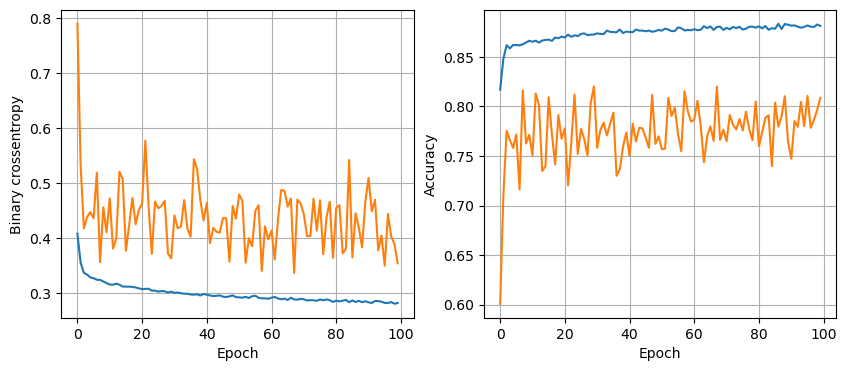

119/119 [==============================] - 0s 561us/step - loss: 0.3440 - accuracy: 0.8722
16 nodes, dropout 0, lr 0.01, batch size 64


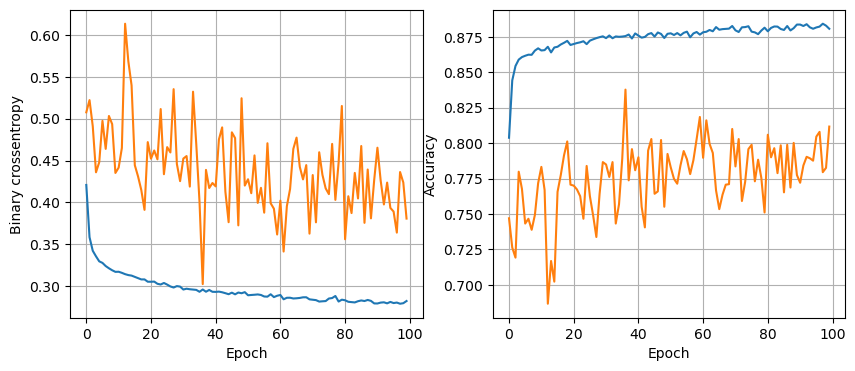

119/119 [==============================] - 0s 562us/step - loss: 0.3189 - accuracy: 0.8707
16 nodes, dropout 0, lr 0.01, batch size 128


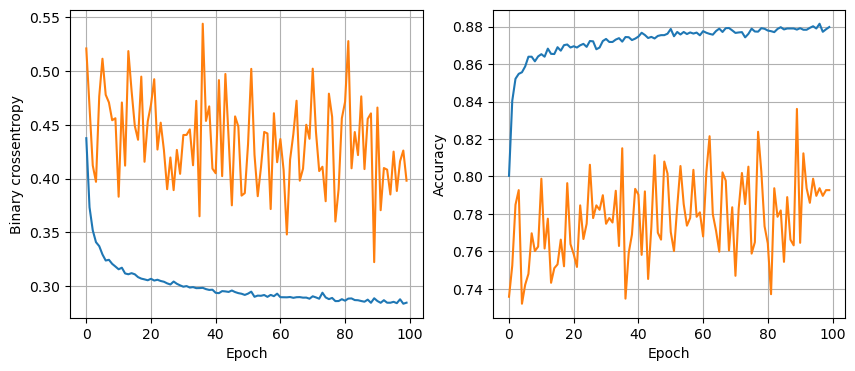

119/119 [==============================] - 0s 602us/step - loss: 0.3394 - accuracy: 0.8701
16 nodes, dropout 0, lr 0.005, batch size 32


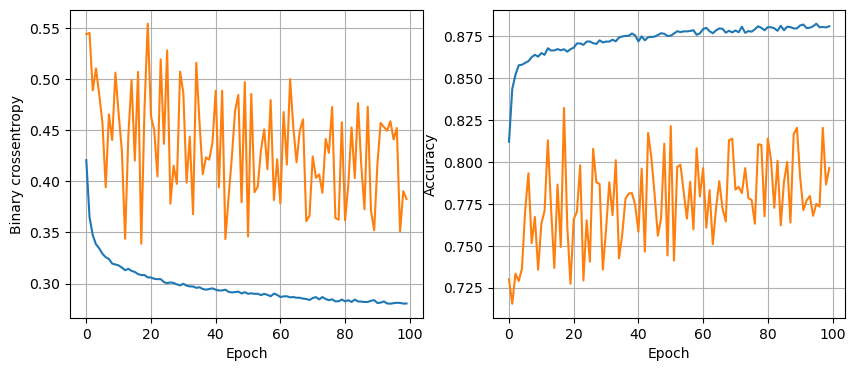

119/119 [==============================] - 0s 567us/step - loss: 0.3289 - accuracy: 0.8738
16 nodes, dropout 0, lr 0.005, batch size 64


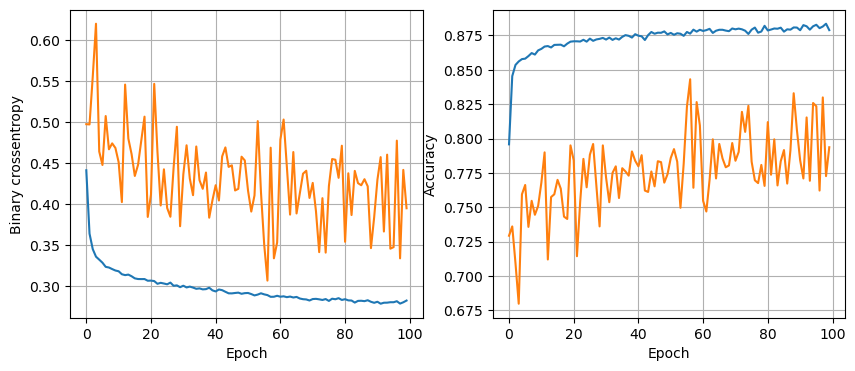

119/119 [==============================] - 0s 726us/step - loss: 0.3138 - accuracy: 0.8720
16 nodes, dropout 0, lr 0.005, batch size 128


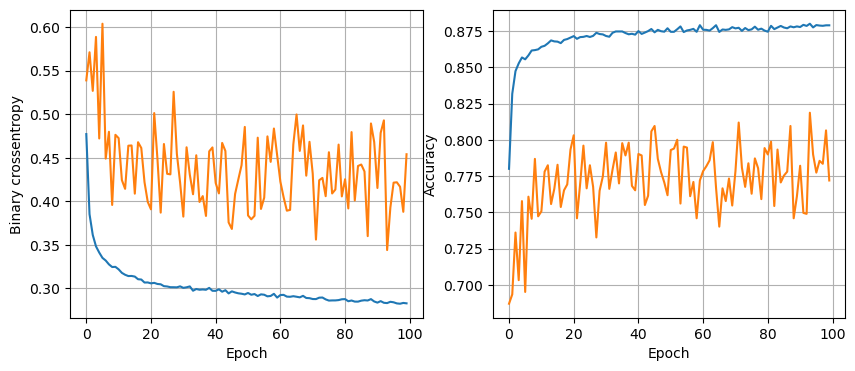

119/119 [==============================] - 0s 627us/step - loss: 0.3122 - accuracy: 0.8749
16 nodes, dropout 0, lr 0.001, batch size 32


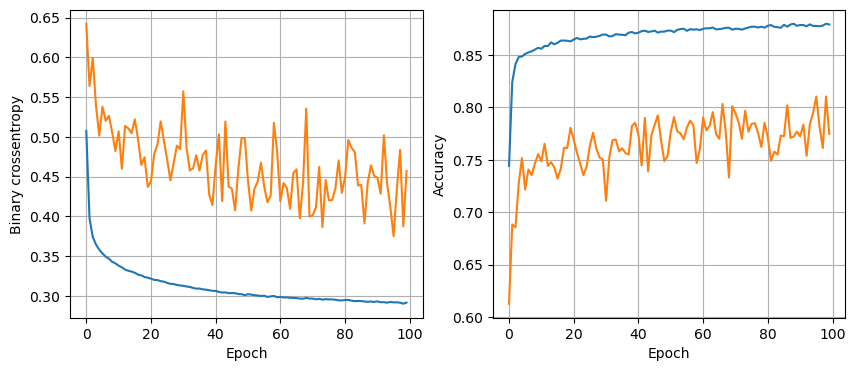

119/119 [==============================] - 0s 574us/step - loss: 0.3084 - accuracy: 0.8746
16 nodes, dropout 0, lr 0.001, batch size 64


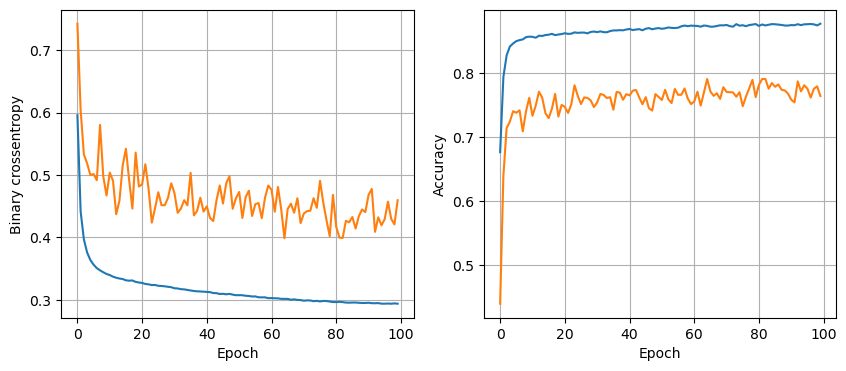

119/119 [==============================] - 0s 549us/step - loss: 0.3113 - accuracy: 0.8749
16 nodes, dropout 0, lr 0.001, batch size 128


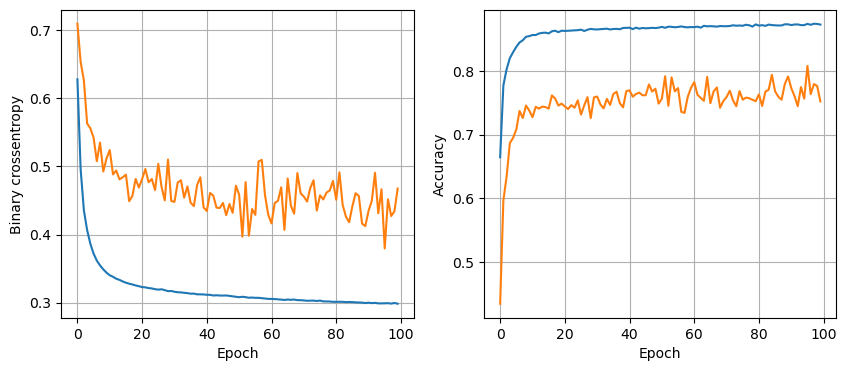

119/119 [==============================] - 0s 564us/step - loss: 0.3052 - accuracy: 0.8796
16 nodes, dropout 0.2, lr 0.01, batch size 32


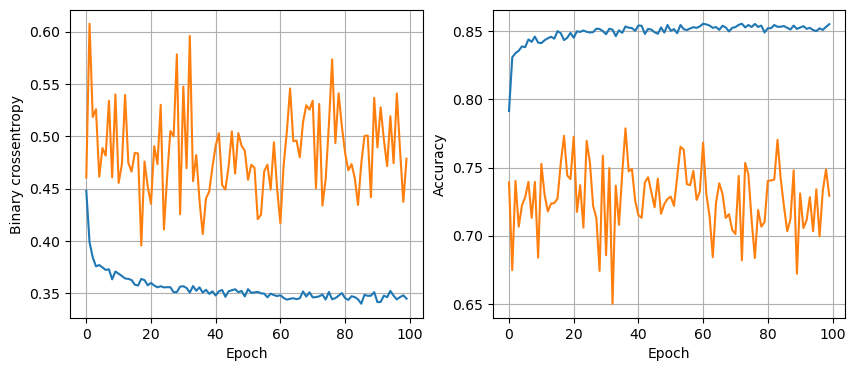

119/119 [==============================] - 0s 546us/step - loss: 0.3175 - accuracy: 0.8736
16 nodes, dropout 0.2, lr 0.01, batch size 64


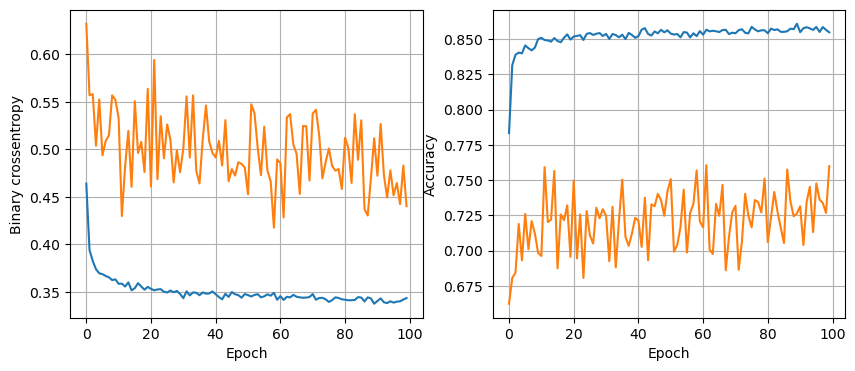

119/119 [==============================] - 0s 583us/step - loss: 0.3192 - accuracy: 0.8730
16 nodes, dropout 0.2, lr 0.01, batch size 128


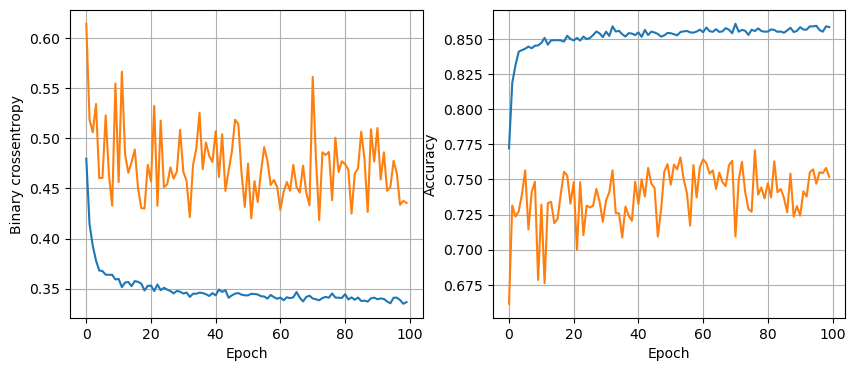

119/119 [==============================] - 0s 587us/step - loss: 0.3166 - accuracy: 0.8783
16 nodes, dropout 0.2, lr 0.005, batch size 32


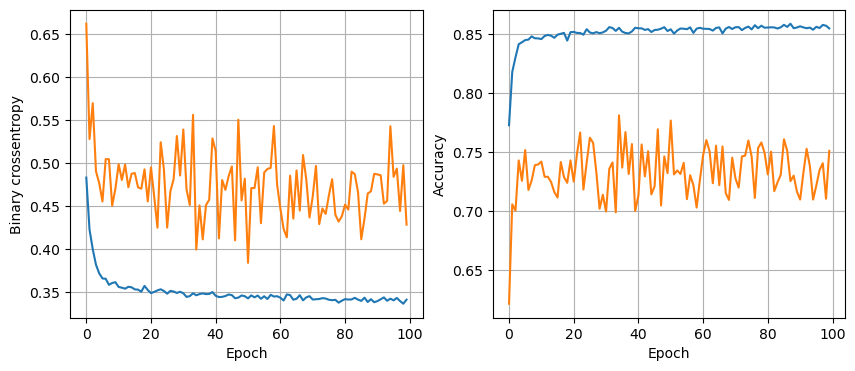

119/119 [==============================] - 0s 548us/step - loss: 0.3206 - accuracy: 0.8730
16 nodes, dropout 0.2, lr 0.005, batch size 64


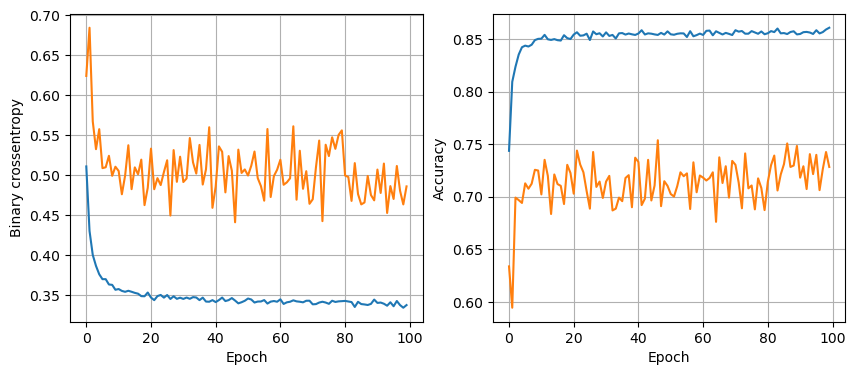

119/119 [==============================] - 0s 575us/step - loss: 0.3115 - accuracy: 0.8707
16 nodes, dropout 0.2, lr 0.005, batch size 128


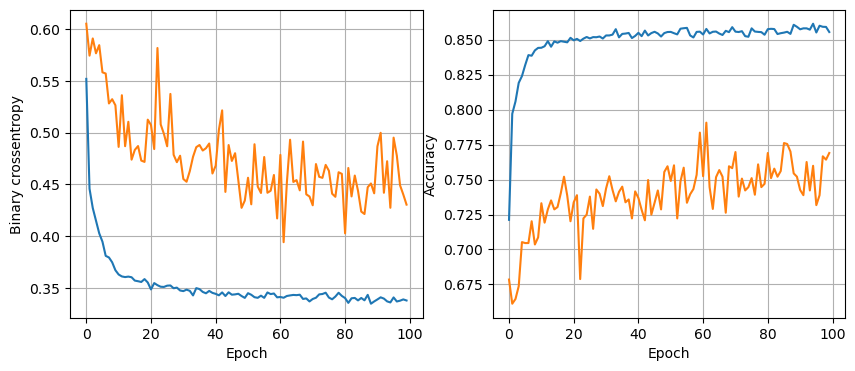

119/119 [==============================] - 0s 584us/step - loss: 0.3169 - accuracy: 0.8738
16 nodes, dropout 0.2, lr 0.001, batch size 32


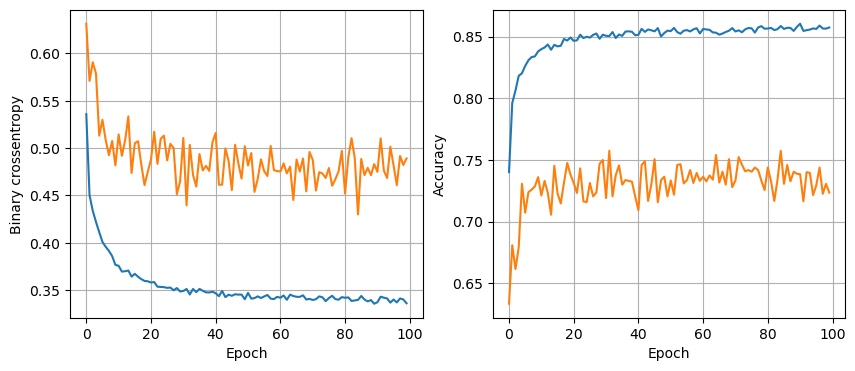

119/119 [==============================] - 0s 637us/step - loss: 0.3152 - accuracy: 0.8751
16 nodes, dropout 0.2, lr 0.001, batch size 64


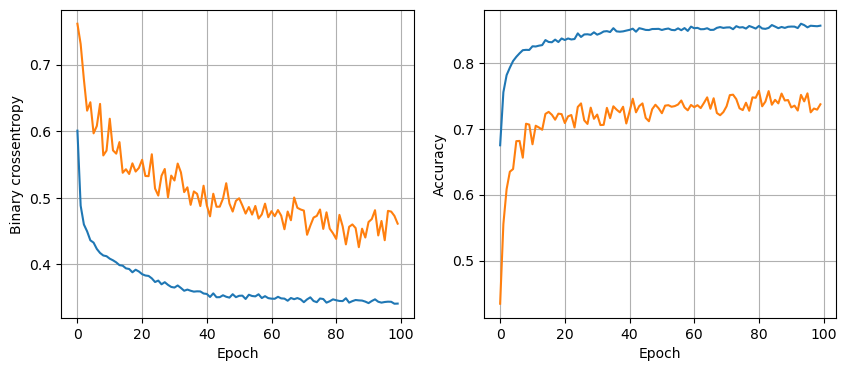

119/119 [==============================] - 0s 581us/step - loss: 0.3114 - accuracy: 0.8749
16 nodes, dropout 0.2, lr 0.001, batch size 128


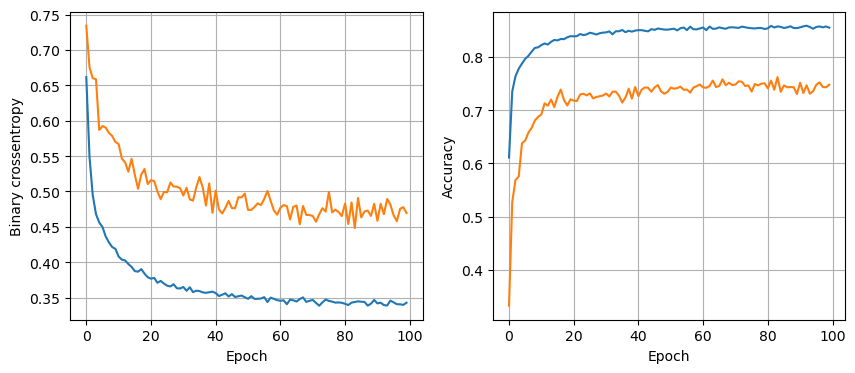

119/119 [==============================] - 0s 623us/step - loss: 0.3128 - accuracy: 0.8722
32 nodes, dropout 0, lr 0.01, batch size 32


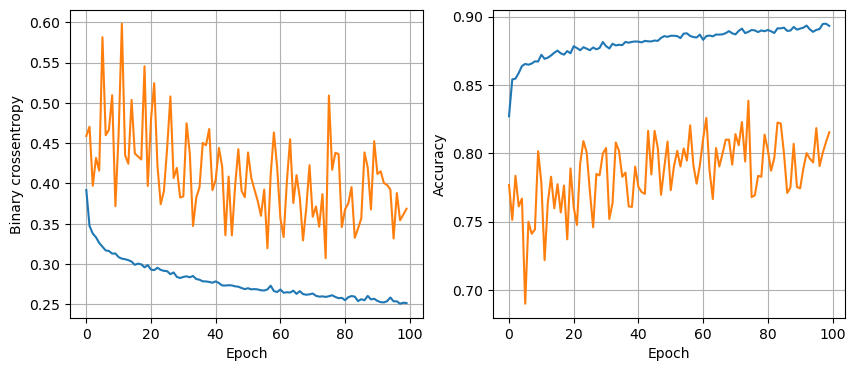

119/119 [==============================] - 0s 648us/step - loss: 0.4046 - accuracy: 0.8641
32 nodes, dropout 0, lr 0.01, batch size 64


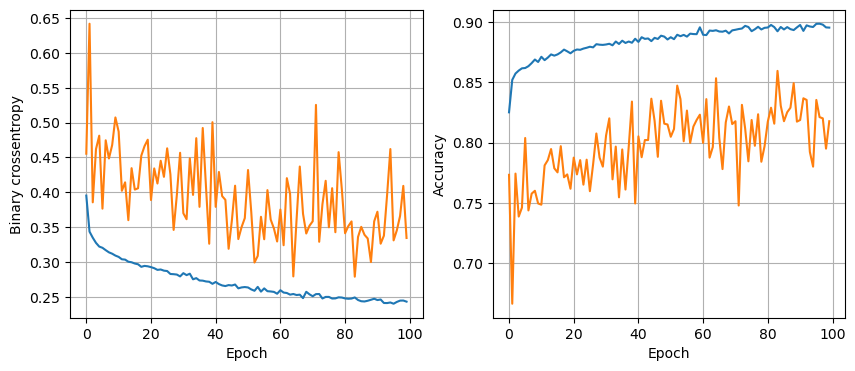

119/119 [==============================] - 0s 655us/step - loss: 0.3842 - accuracy: 0.8749
32 nodes, dropout 0, lr 0.01, batch size 128


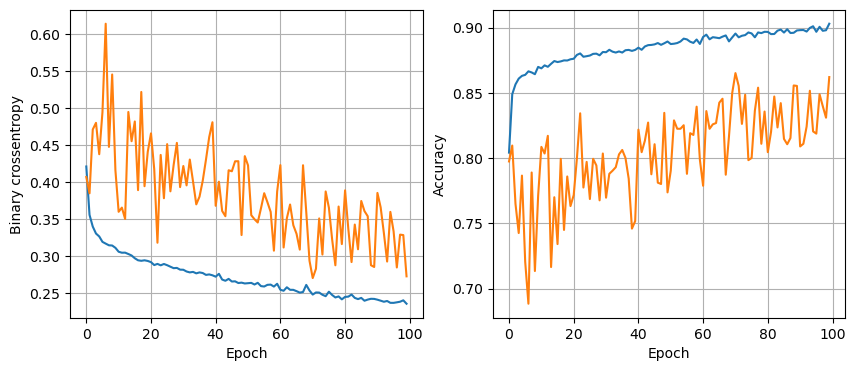

119/119 [==============================] - 0s 623us/step - loss: 0.3672 - accuracy: 0.8654
32 nodes, dropout 0, lr 0.005, batch size 32


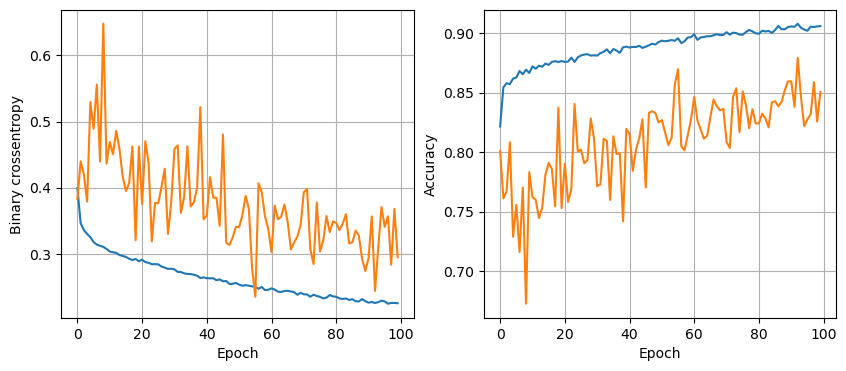

119/119 [==============================] - 0s 763us/step - loss: 0.4044 - accuracy: 0.8646
32 nodes, dropout 0, lr 0.005, batch size 64


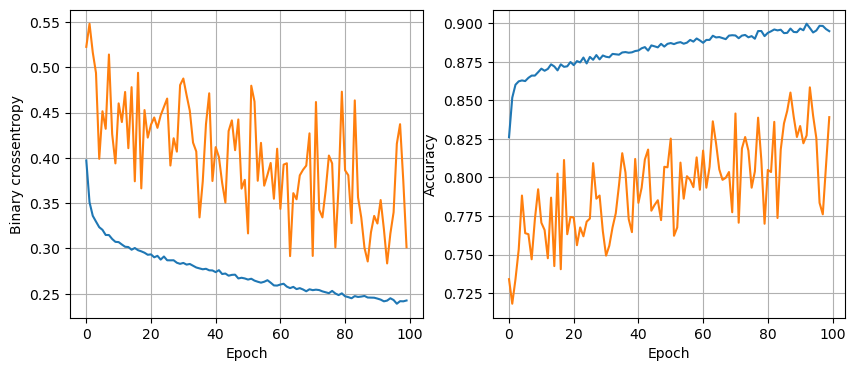

119/119 [==============================] - 0s 540us/step - loss: 0.3673 - accuracy: 0.8523
32 nodes, dropout 0, lr 0.005, batch size 128


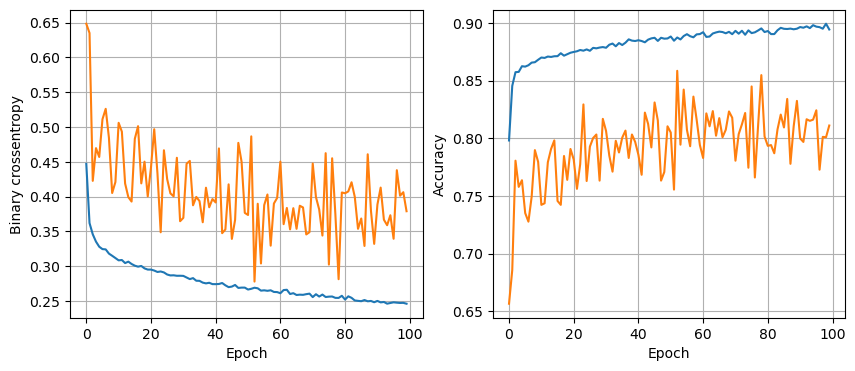

119/119 [==============================] - 0s 559us/step - loss: 0.3308 - accuracy: 0.8762
32 nodes, dropout 0, lr 0.001, batch size 32


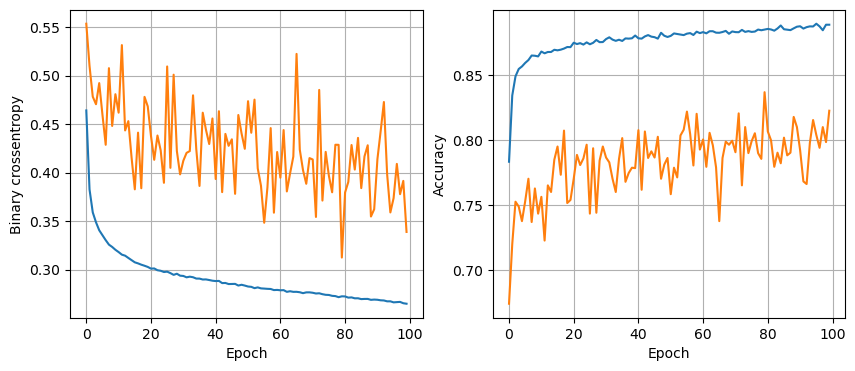

119/119 [==============================] - 0s 539us/step - loss: 0.3389 - accuracy: 0.8691
32 nodes, dropout 0, lr 0.001, batch size 64


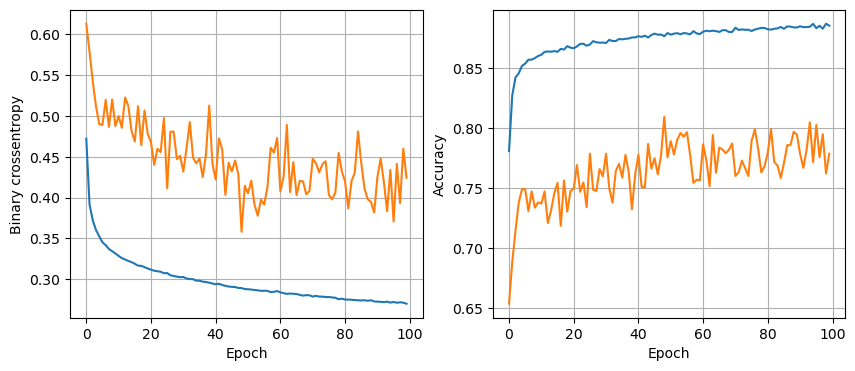

119/119 [==============================] - 0s 605us/step - loss: 0.3115 - accuracy: 0.8704
32 nodes, dropout 0, lr 0.001, batch size 128


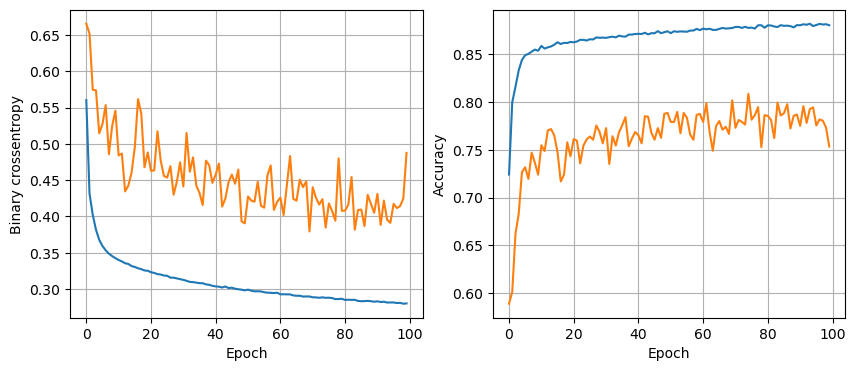

119/119 [==============================] - 0s 576us/step - loss: 0.3124 - accuracy: 0.8793
32 nodes, dropout 0.2, lr 0.01, batch size 32


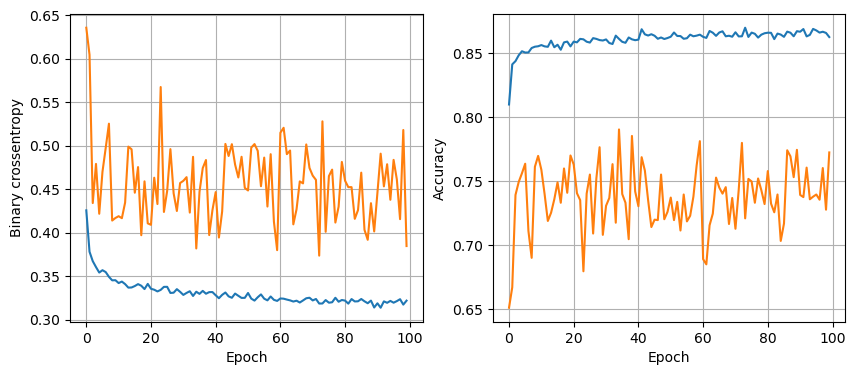

119/119 [==============================] - 0s 673us/step - loss: 0.3152 - accuracy: 0.8730
32 nodes, dropout 0.2, lr 0.01, batch size 64


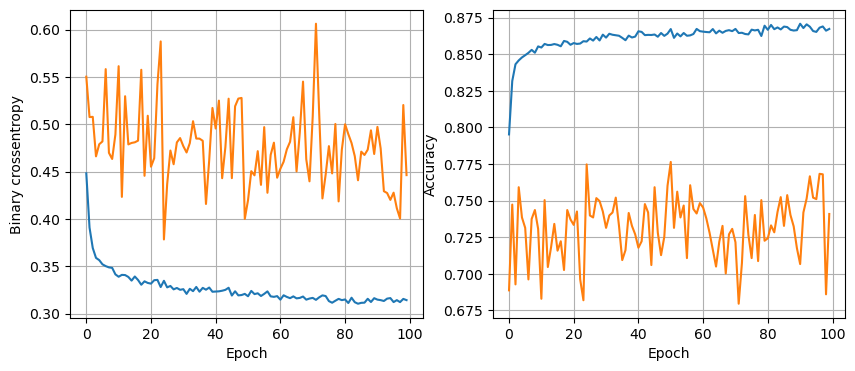

119/119 [==============================] - 0s 567us/step - loss: 0.3098 - accuracy: 0.8741
32 nodes, dropout 0.2, lr 0.01, batch size 128


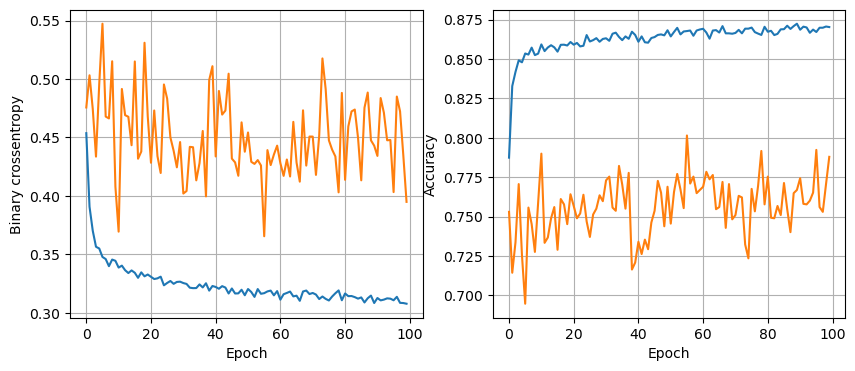

119/119 [==============================] - 0s 577us/step - loss: 0.3038 - accuracy: 0.8778
32 nodes, dropout 0.2, lr 0.005, batch size 32


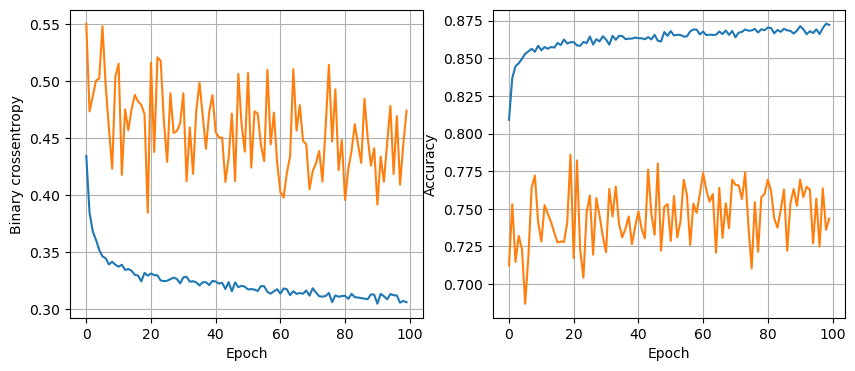

119/119 [==============================] - 0s 556us/step - loss: 0.3069 - accuracy: 0.8799
32 nodes, dropout 0.2, lr 0.005, batch size 64


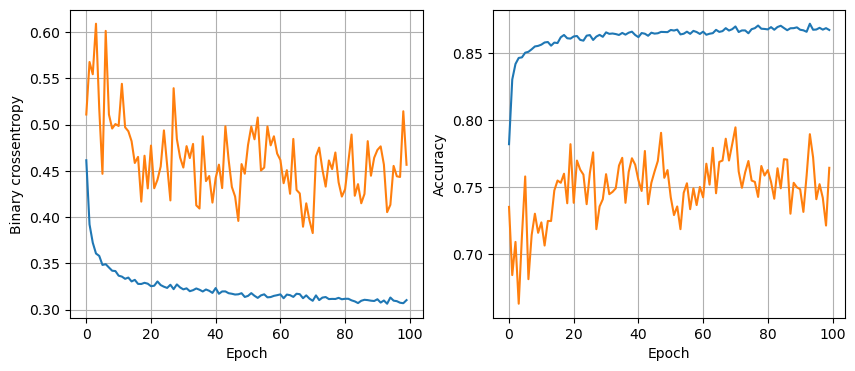

119/119 [==============================] - 0s 555us/step - loss: 0.3077 - accuracy: 0.8775
32 nodes, dropout 0.2, lr 0.005, batch size 128


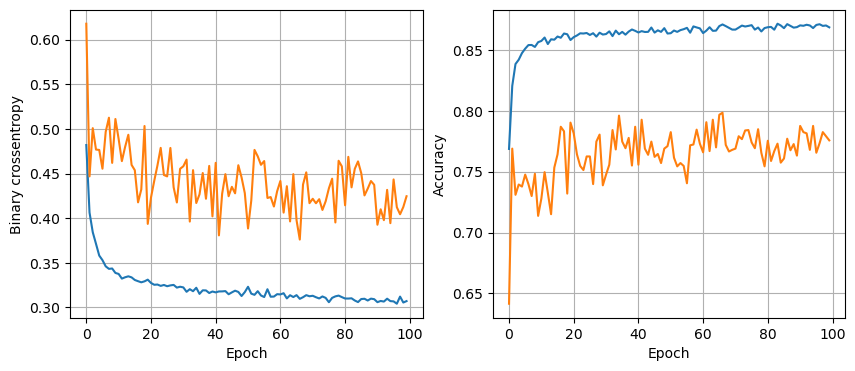

119/119 [==============================] - 0s 698us/step - loss: 0.3058 - accuracy: 0.8775
32 nodes, dropout 0.2, lr 0.001, batch size 32


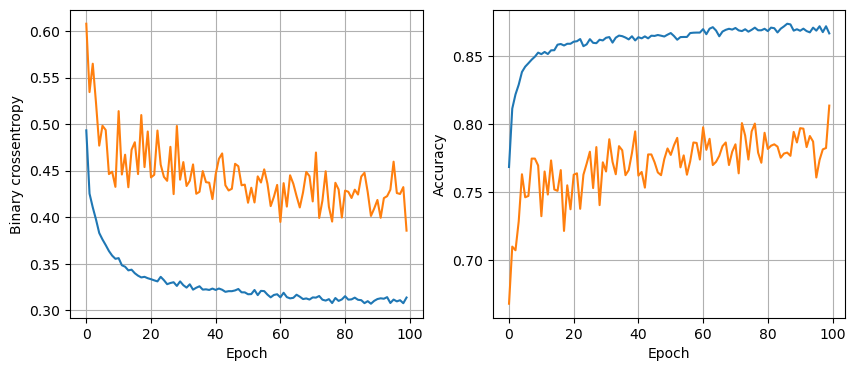

119/119 [==============================] - 0s 531us/step - loss: 0.3083 - accuracy: 0.8759
32 nodes, dropout 0.2, lr 0.001, batch size 64


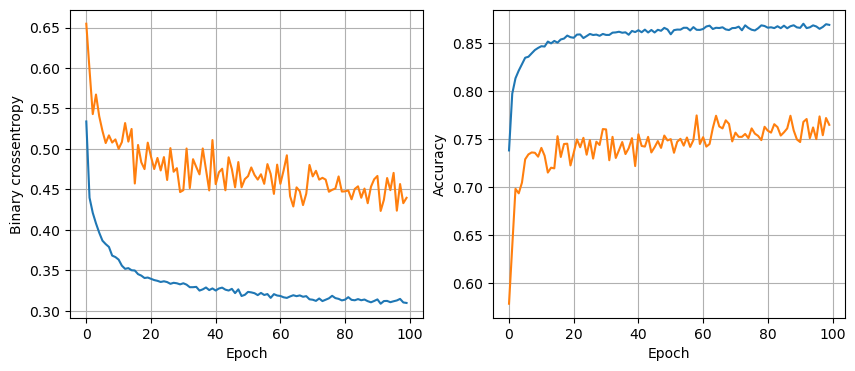

119/119 [==============================] - 0s 536us/step - loss: 0.2998 - accuracy: 0.8788
32 nodes, dropout 0.2, lr 0.001, batch size 128


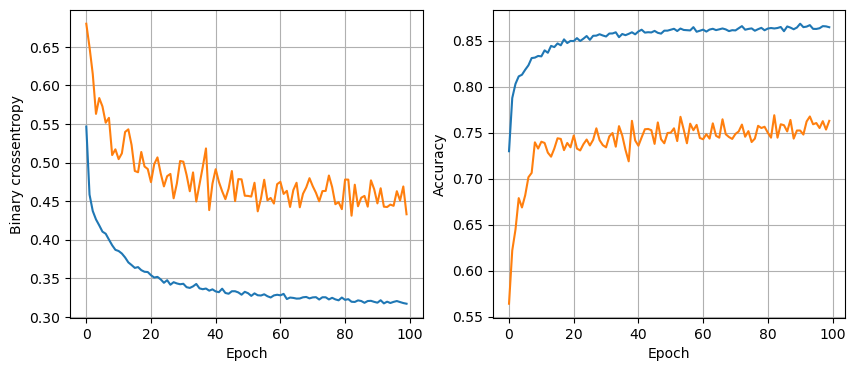

119/119 [==============================] - 0s 576us/step - loss: 0.3056 - accuracy: 0.8799
64 nodes, dropout 0, lr 0.01, batch size 32


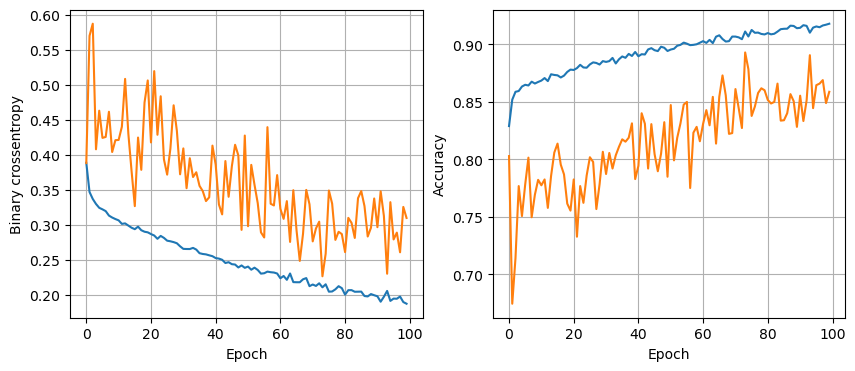

119/119 [==============================] - 0s 545us/step - loss: 0.5217 - accuracy: 0.8630
64 nodes, dropout 0, lr 0.01, batch size 64


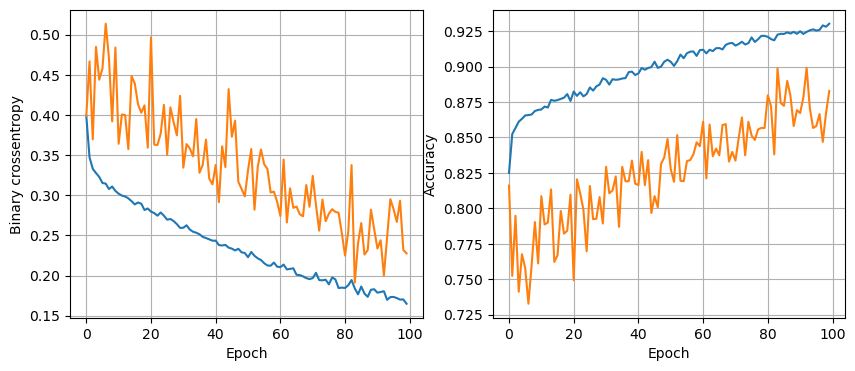

119/119 [==============================] - 0s 546us/step - loss: 0.7487 - accuracy: 0.8412
64 nodes, dropout 0, lr 0.01, batch size 128


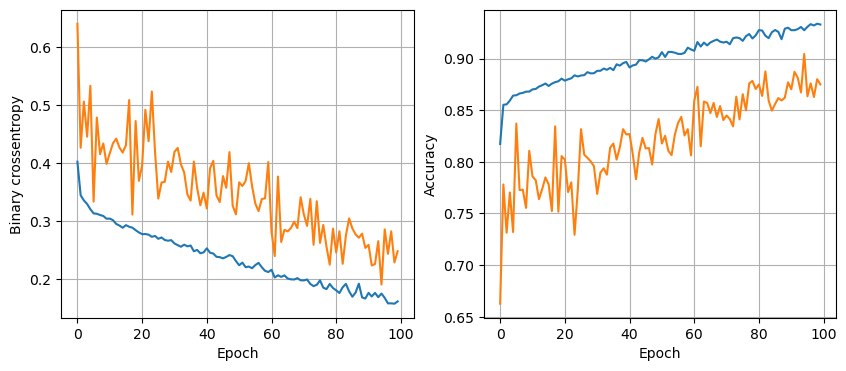

119/119 [==============================] - 0s 543us/step - loss: 0.5898 - accuracy: 0.8594
64 nodes, dropout 0, lr 0.005, batch size 32


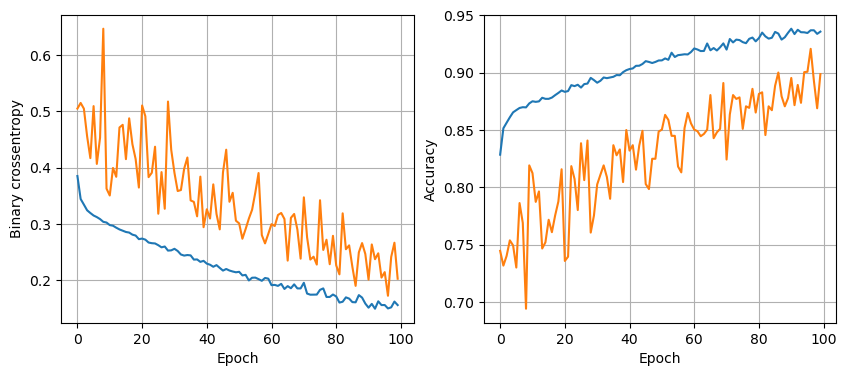

119/119 [==============================] - 0s 626us/step - loss: 0.6503 - accuracy: 0.8470
64 nodes, dropout 0, lr 0.005, batch size 64


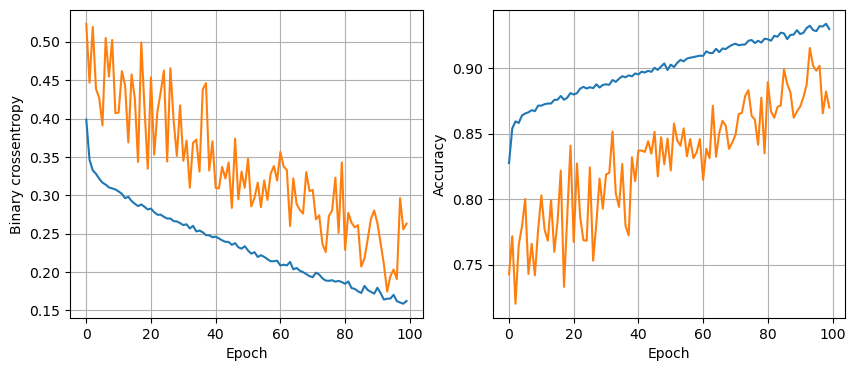

119/119 [==============================] - 0s 579us/step - loss: 0.5335 - accuracy: 0.8559
64 nodes, dropout 0, lr 0.005, batch size 128


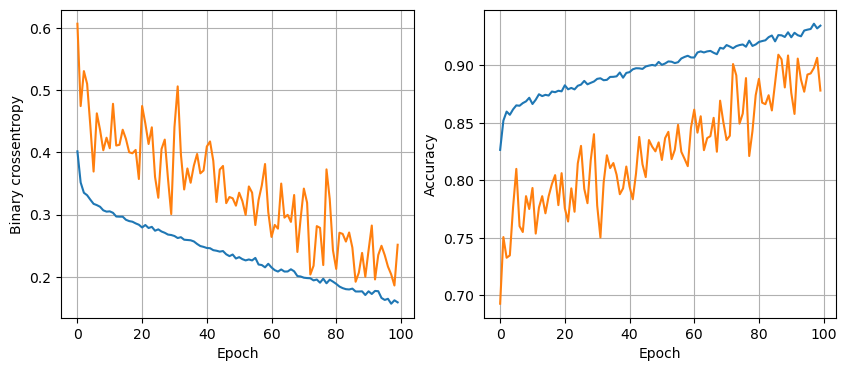

119/119 [==============================] - 0s 547us/step - loss: 0.4944 - accuracy: 0.8612
64 nodes, dropout 0, lr 0.001, batch size 32


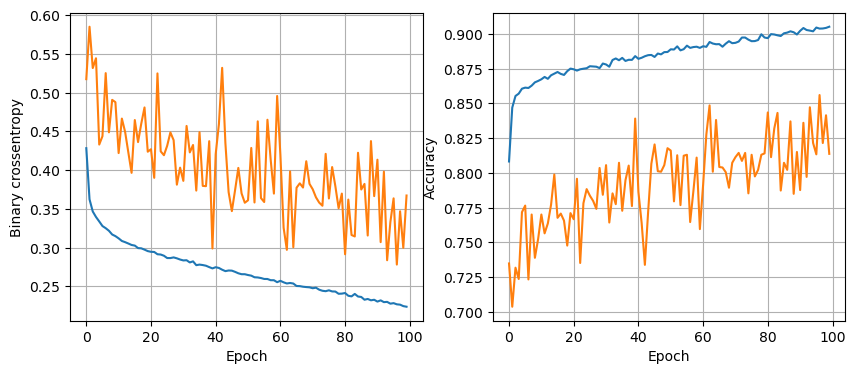

119/119 [==============================] - 0s 635us/step - loss: 0.3434 - accuracy: 0.8746
64 nodes, dropout 0, lr 0.001, batch size 64


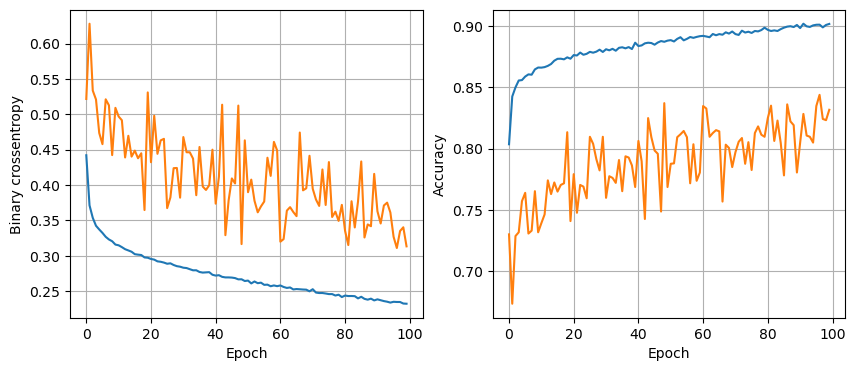

119/119 [==============================] - 0s 612us/step - loss: 0.3387 - accuracy: 0.8649
64 nodes, dropout 0, lr 0.001, batch size 128


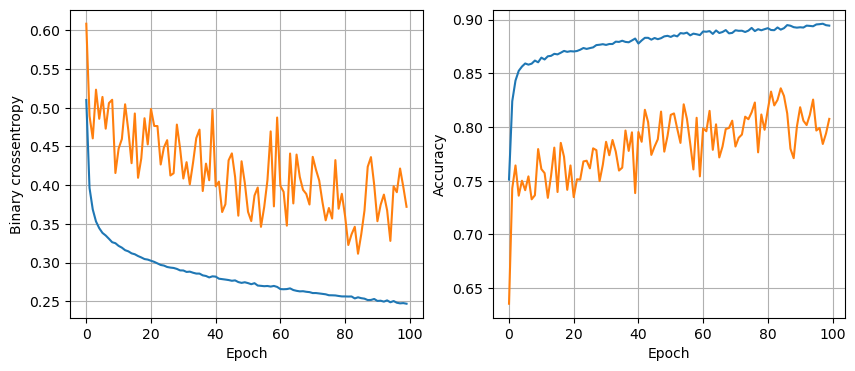

119/119 [==============================] - 0s 540us/step - loss: 0.3252 - accuracy: 0.8730
64 nodes, dropout 0.2, lr 0.01, batch size 32


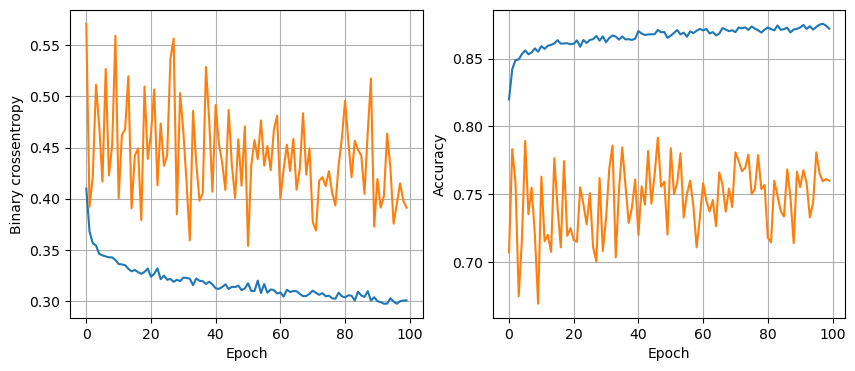

119/119 [==============================] - 0s 556us/step - loss: 0.3380 - accuracy: 0.8780
64 nodes, dropout 0.2, lr 0.01, batch size 64


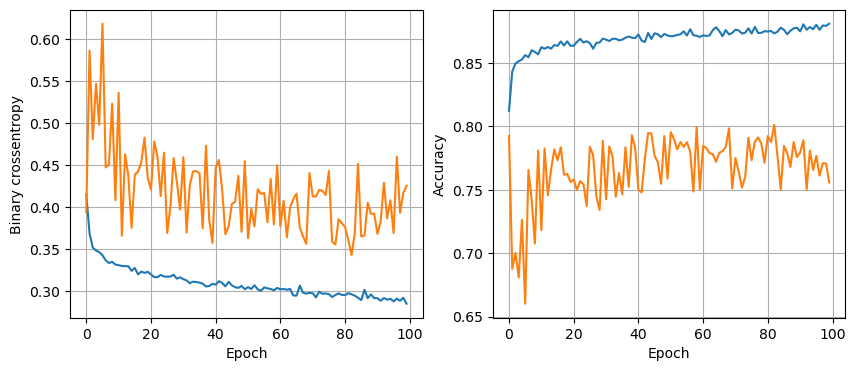

119/119 [==============================] - 0s 586us/step - loss: 0.3077 - accuracy: 0.8809
64 nodes, dropout 0.2, lr 0.01, batch size 128


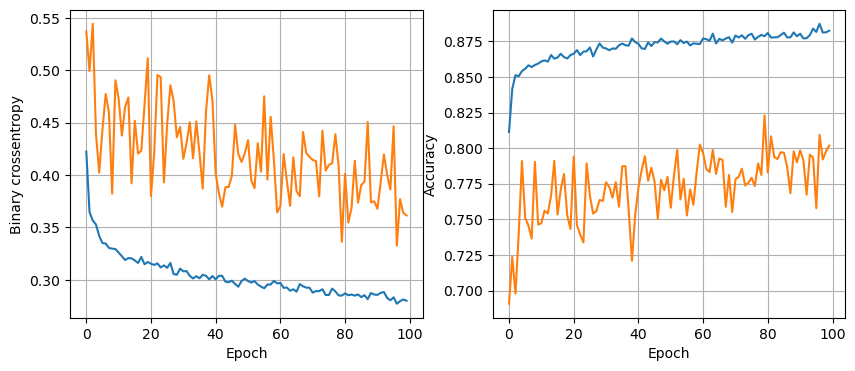

119/119 [==============================] - 0s 626us/step - loss: 0.3166 - accuracy: 0.8759
64 nodes, dropout 0.2, lr 0.005, batch size 32


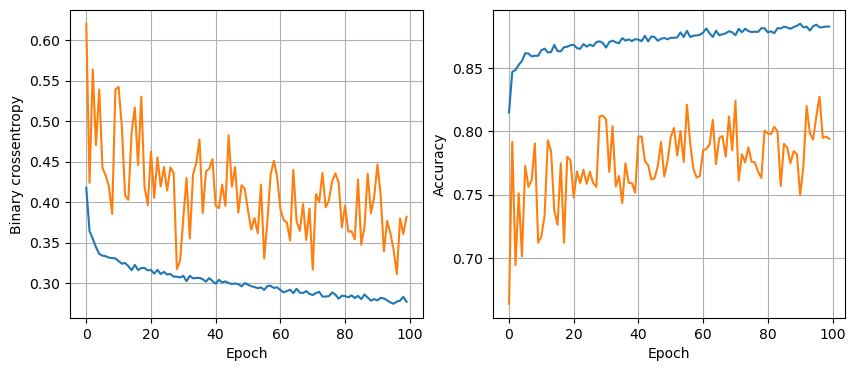

119/119 [==============================] - 0s 612us/step - loss: 0.3189 - accuracy: 0.8791
64 nodes, dropout 0.2, lr 0.005, batch size 64


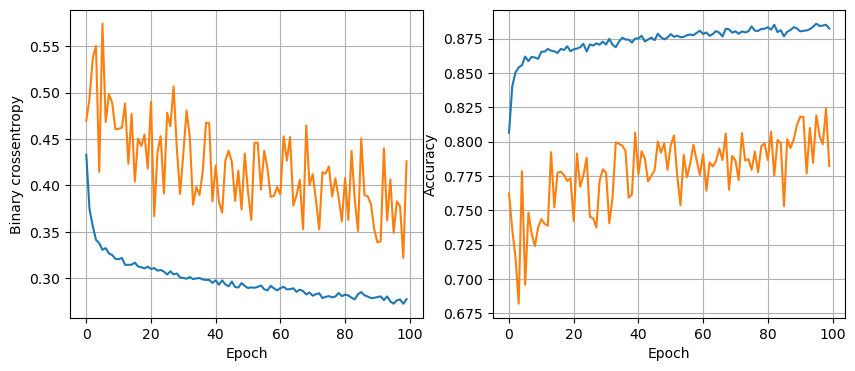

119/119 [==============================] - 0s 563us/step - loss: 0.3037 - accuracy: 0.8835
64 nodes, dropout 0.2, lr 0.005, batch size 128


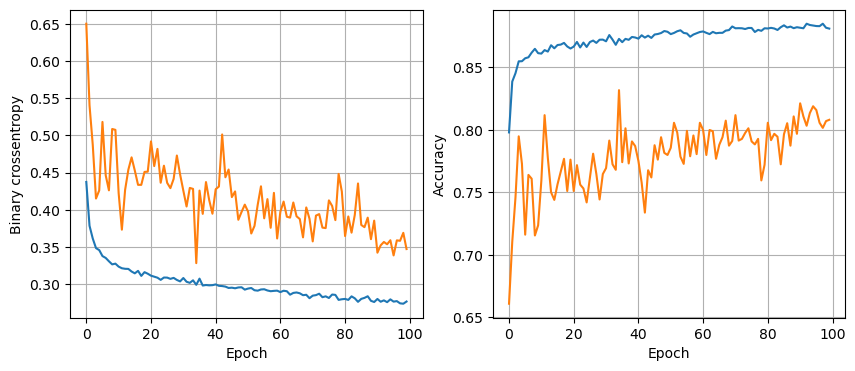

119/119 [==============================] - 0s 544us/step - loss: 0.3193 - accuracy: 0.8712
64 nodes, dropout 0.2, lr 0.001, batch size 32


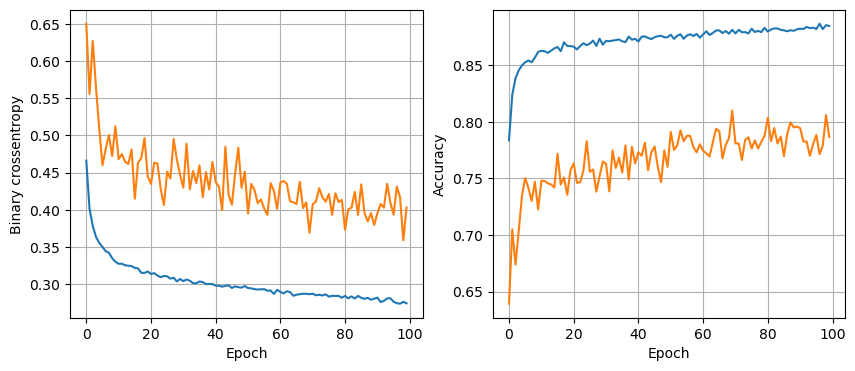

119/119 [==============================] - 0s 567us/step - loss: 0.3012 - accuracy: 0.8814
64 nodes, dropout 0.2, lr 0.001, batch size 64


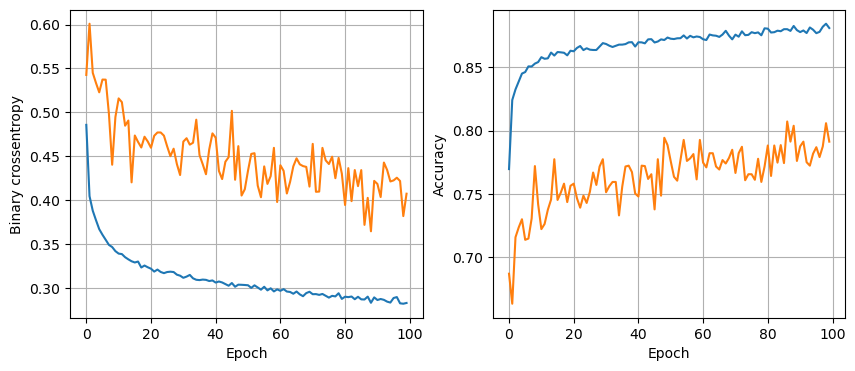

119/119 [==============================] - 0s 573us/step - loss: 0.2990 - accuracy: 0.8825
64 nodes, dropout 0.2, lr 0.001, batch size 128


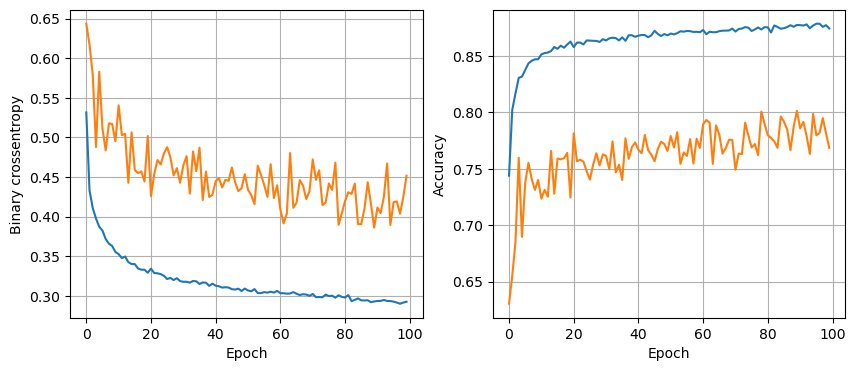

119/119 [==============================] - 0s 731us/step - loss: 0.2958 - accuracy: 0.8820


In [25]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [26]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 577us/step


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1380
           1       0.87      0.96      0.91      2424

    accuracy                           0.88      3804
   macro avg       0.89      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

